In [135]:
import os

import numpy as np
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.cluster import KMeans

In [128]:
#Setup Database
load_dotenv()
uri = os.environ['DB_URI']
client = MongoClient(uri)
db = client["rosen"]
collection = db["big_data_2"]

In [129]:
documents = collection.find({}, {"_id": 1, "instrument": 1, "configuration": 1, "velocity": 1})
average_velocities = pd.DataFrame(list(documents))

In [136]:
average_velocities['velocity'] = average_velocities['velocity'].apply(lambda x : np.mean(x))

In [152]:
average_velocities.head()

,_id,instrument,configuration,velocity
0,000bc7ea-8918-420c-bd13-30e1a6e8dd00,Pufferfish,Africa,0.766613
1,006b0b34-324b-496a-8ed7-a40f7d689ee9,Unicorn,Europe,4.469762
2,007ff213-9b5d-4243-9c8b-5eae997ac0ee,Pufferfish,Australia,NaN
3,009a6e9c-b288-42f5-a905-2a6df414319c,Dolphin,America,1.873429
4,009e8968-34ee-4784-b57a-ecd2beeb1993,Elephant,Australia,1.427193


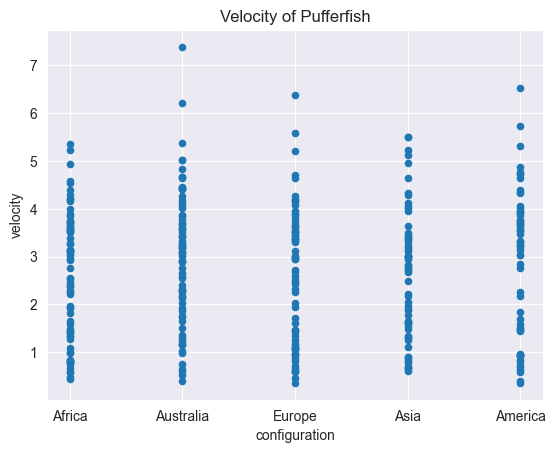

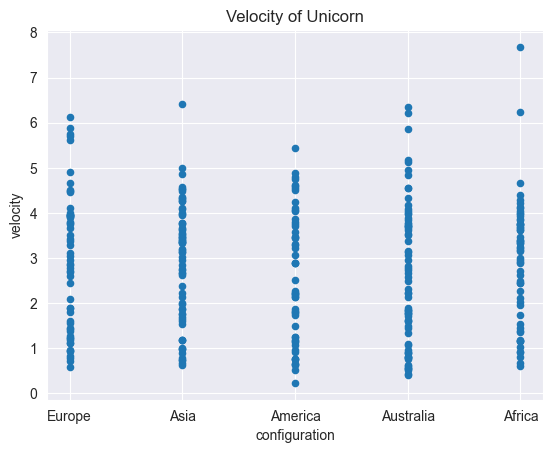

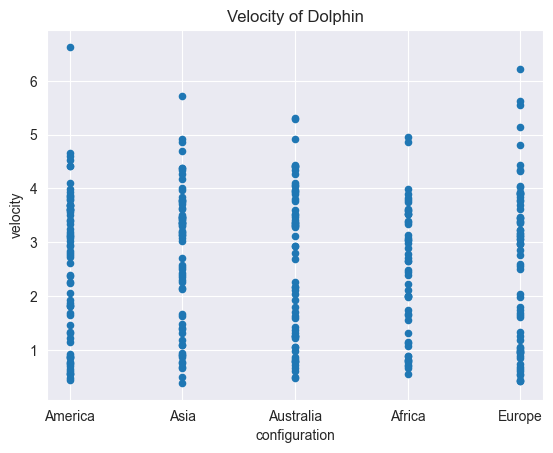

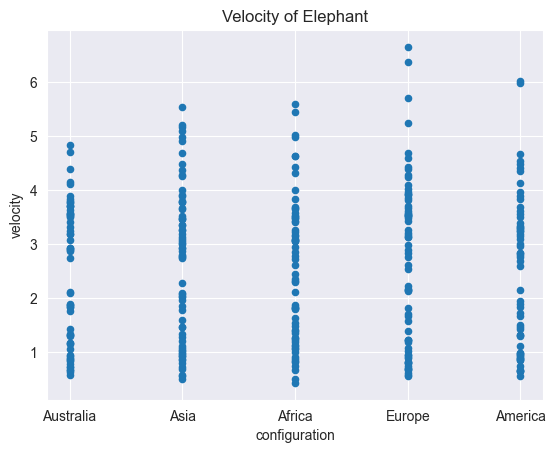

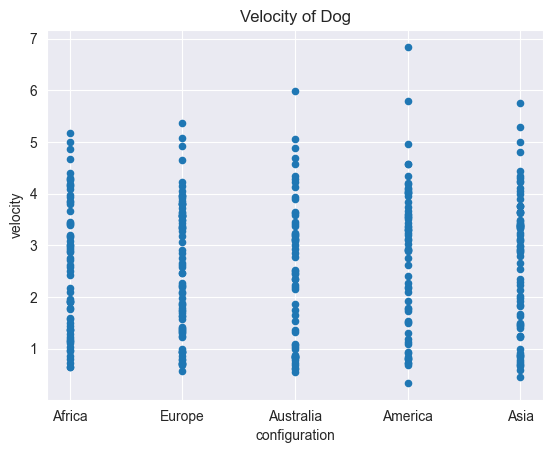

In [162]:
for val in average_velocities['instrument'].unique():
    sdf = average_velocities.loc[average_velocities['instrument']==val]
    sdf.plot(x='configuration', y='velocity', kind='scatter', title=f'Velocity of {val}')